<a href="https://colab.research.google.com/github/iam-fern/Generate_multiplication_1X/blob/main/GQtest_data(y_hat)_multi_delta_(_2_4)_n30_01.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import numpy as np
import os
import statistics as stats
import scipy.stats as ss
from scipy.stats import f_oneway
from scipy import stats
from google.colab import drive
import scipy.stats as stats
import time
import statsmodels.api as sm
from google.colab import files

/usr/local/lib/python3.7/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [2]:
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
base_path = '/content/drive/My Drive/pattern_multiplication_1X/multiplication_delta_-2.4'

In [4]:
os.listdir(base_path)

['data_multi_delta_-2.4_n250.csv',
 'data_multi_delta_-2.4_n120.csv',
 'data_multi_delta_-2.4_n60.csv',
 'data_multi_delta_-2.4_n30.csv',
 'data_multi_delta_-2.4_n20.csv']

In [5]:
# เรียกใช้ข้อมูลจากไฟล์ โดยผ่านฟังก์ชัน ที่ชื่อว่า read_csv
file_path = os.path.join(base_path, 'data_multi_delta_-2.4_n30.csv')
pd.read_csv(file_path)

,rep,index,x1,e,Y,y_hat,e_hat
0,0.0,0.0,31.017297,-0.009332,41.007965,41.005893,0.002072
1,0.0,1.0,46.142576,-0.019861,56.122716,56.134154,-0.011438
2,0.0,2.0,64.535555,-0.009484,74.526071,74.530758,-0.004687
3,0.0,3.0,64.995097,0.004047,74.999144,74.990391,0.008753
4,0.0,4.0,95.677372,-0.002486,105.674886,105.678714,-0.003828
...,...,...,...,...,...,...,...
29995,999.0,25.0,43.300136,-0.021753,53.278384,53.300180,-0.021797
29996,999.0,26.0,91.919657,0.001732,101.921389,101.921081,0.000308
29997,999.0,27.0,39.384069,0.010017,49.394086,49.384002,0.010083
29998,999.0,28.0,75.815444,-0.005676,85.809768,85.816411,-0.006643


In [6]:
df = pd.read_csv(file_path)
df

,rep,index,x1,e,Y,y_hat,e_hat
0,0.0,0.0,31.017297,-0.009332,41.007965,41.005893,0.002072
1,0.0,1.0,46.142576,-0.019861,56.122716,56.134154,-0.011438
2,0.0,2.0,64.535555,-0.009484,74.526071,74.530758,-0.004687
3,0.0,3.0,64.995097,0.004047,74.999144,74.990391,0.008753
4,0.0,4.0,95.677372,-0.002486,105.674886,105.678714,-0.003828
...,...,...,...,...,...,...,...
29995,999.0,25.0,43.300136,-0.021753,53.278384,53.300180,-0.021797
29996,999.0,26.0,91.919657,0.001732,101.921389,101.921081,0.000308
29997,999.0,27.0,39.384069,0.010017,49.394086,49.384002,0.010083
29998,999.0,28.0,75.815444,-0.005676,85.809768,85.816411,-0.006643


In [7]:
df = pd.read_csv(file_path, index_col=['rep', 'index'])
df

x1         e           Y       y_hat     e_hat
rep   index                                                       
0.0   0.0    31.017297 -0.009332   41.007965   41.005893  0.002072
      1.0    46.142576 -0.019861   56.122716   56.134154 -0.011438
      2.0    64.535555 -0.009484   74.526071   74.530758 -0.004687
      3.0    64.995097  0.004047   74.999144   74.990391  0.008753
      4.0    95.677372 -0.002486  105.674886  105.678714 -0.003828
...                ...       ...         ...         ...       ...
999.0 25.0   43.300136 -0.021753   53.278384   53.300180 -0.021797
      26.0   91.919657  0.001732  101.921389  101.921081  0.000308
      27.0   39.384069  0.010017   49.394086   49.384002  0.010083
      28.0   75.815444 -0.005676   85.809768   85.816411 -0.006643
      29.0   54.271784 -0.005218   64.266566   64.272139 -0.005574

[30000 rows x 5 columns]

In [8]:
# ลบข้อมูลที่มี missing values
table = df.dropna()
table

x1         e           Y       y_hat     e_hat
rep   index                                                       
0.0   0.0    31.017297 -0.009332   41.007965   41.005893  0.002072
      1.0    46.142576 -0.019861   56.122716   56.134154 -0.011438
      2.0    64.535555 -0.009484   74.526071   74.530758 -0.004687
      3.0    64.995097  0.004047   74.999144   74.990391  0.008753
      4.0    95.677372 -0.002486  105.674886  105.678714 -0.003828
...                ...       ...         ...         ...       ...
999.0 25.0   43.300136 -0.021753   53.278384   53.300180 -0.021797
      26.0   91.919657  0.001732  101.921389  101.921081  0.000308
      27.0   39.384069  0.010017   49.394086   49.384002  0.010083
      28.0   75.815444 -0.005676   85.809768   85.816411 -0.006643
      29.0   54.271784 -0.005218   64.266566   64.272139 -0.005574

[30000 rows x 5 columns]

In [9]:
table.reset_index(inplace=True)
table

,rep,index,x1,e,Y,y_hat,e_hat
0,0.0,0.0,31.017297,-0.009332,41.007965,41.005893,0.002072
1,0.0,1.0,46.142576,-0.019861,56.122716,56.134154,-0.011438
2,0.0,2.0,64.535555,-0.009484,74.526071,74.530758,-0.004687
3,0.0,3.0,64.995097,0.004047,74.999144,74.990391,0.008753
4,0.0,4.0,95.677372,-0.002486,105.674886,105.678714,-0.003828
...,...,...,...,...,...,...,...
29995,999.0,25.0,43.300136,-0.021753,53.278384,53.300180,-0.021797
29996,999.0,26.0,91.919657,0.001732,101.921389,101.921081,0.000308
29997,999.0,27.0,39.384069,0.010017,49.394086,49.384002,0.010083
29998,999.0,28.0,75.815444,-0.005676,85.809768,85.816411,-0.006643


In [10]:
table.set_index(['rep', 'index'], inplace=True)

In [11]:
table

x1         e           Y       y_hat     e_hat
rep   index                                                       
0.0   0.0    31.017297 -0.009332   41.007965   41.005893  0.002072
      1.0    46.142576 -0.019861   56.122716   56.134154 -0.011438
      2.0    64.535555 -0.009484   74.526071   74.530758 -0.004687
      3.0    64.995097  0.004047   74.999144   74.990391  0.008753
      4.0    95.677372 -0.002486  105.674886  105.678714 -0.003828
...                ...       ...         ...         ...       ...
999.0 25.0   43.300136 -0.021753   53.278384   53.300180 -0.021797
      26.0   91.919657  0.001732  101.921389  101.921081  0.000308
      27.0   39.384069  0.010017   49.394086   49.384002  0.010083
      28.0   75.815444 -0.005676   85.809768   85.816411 -0.006643
      29.0   54.271784 -0.005218   64.266566   64.272139 -0.005574

[30000 rows x 5 columns]

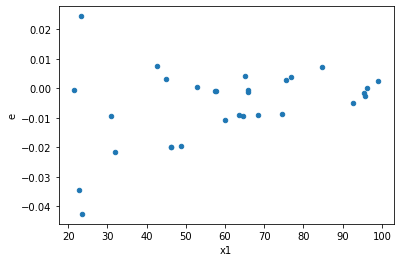

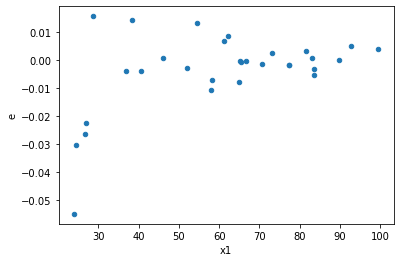

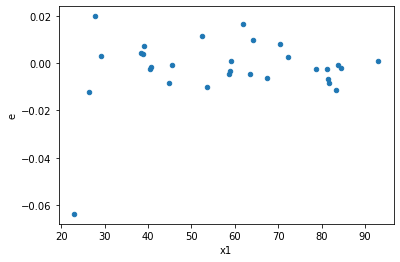

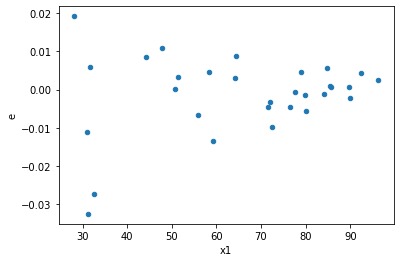

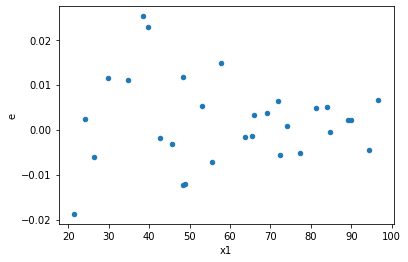

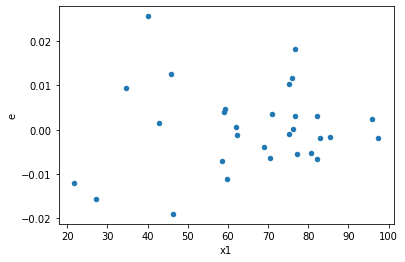

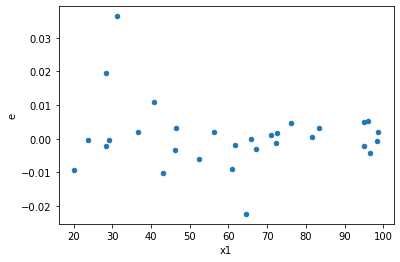

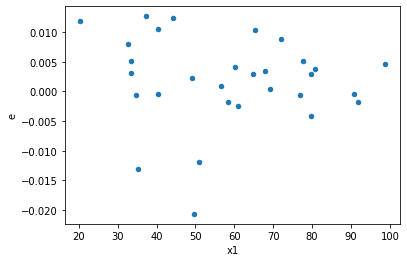

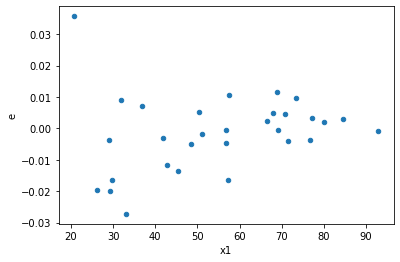

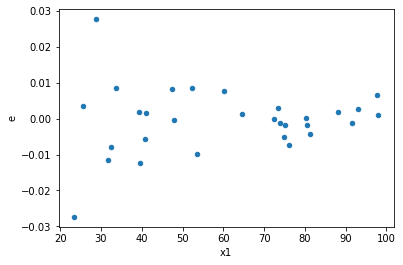

In [12]:
tablenew0 = table.loc[0.0]
tablenew1 = table.loc[1.0]
tablenew2 = table.loc[2.0]
tablenew3 = table.loc[3.0]
tablenew4 = table.loc[4.0]
tablenew5 = table.loc[5.0]
tablenew6 = table.loc[6.0]
tablenew7 = table.loc[7.0]
tablenew8 = table.loc[8.0]
tablenew9 = table.loc[9.0]
tablenew0.plot(x ='x1', y='e', kind = 'scatter')
tablenew1.plot(x ='x1', y='e', kind = 'scatter')
tablenew2.plot(x ='x1', y='e', kind = 'scatter')
tablenew3.plot(x ='x1', y='e', kind = 'scatter')
tablenew4.plot(x ='x1', y='e', kind = 'scatter')
tablenew5.plot(x ='x1', y='e', kind = 'scatter')
tablenew6.plot(x ='x1', y='e', kind = 'scatter')
tablenew7.plot(x ='x1', y='e', kind = 'scatter')
tablenew8.plot(x ='x1', y='e', kind = 'scatter')
tablenew9.plot(x ='x1', y='e', kind = 'scatter')

In [13]:
def get_result(run_replicate, percent_data):
    new_table = table.loc[run_replicate]

    # เรียง data จากน้อยไปมากตาม y_hat
    new_table_sort = new_table.sort_values('y_hat')
    new_table_sort.reset_index(inplace=True)

    new_table_sort.drop(['index'], axis=1, inplace=True)

    # แบ่งข้อมูลกลุ่มที่ 1
    table1 = new_table_sort.iloc[:int(percent_data*new_table_sort.shape[0]) , :]
    y = table1['Y']
    x = table1[['x1']]
    # add constant to predictor variable
    x = sm.add_constant(x)
    # fit linear regression model
    model1 = sm.OLS(y, x).fit()

    # หาค่า df กลุ่ม 1
    DF1 = model1.df_resid + 1
    SSE1 = model1.ssr
    MSE1 = SSE1/DF1

    # แบ่งข้อมูลกลุ่มที่ 2
    table2 = new_table_sort.iloc[int((1-percent_data)*new_table_sort.shape[0]): , :]

    y = table2['Y']
    x = table2[['x1']]
    x = sm.add_constant(x)
    model2 = sm.OLS(y, x).fit()
    #print(model.summary())

    # หาค่า df กลุ่ม 2
    DF2 = model2.df_resid + 1
    SSE2 = model2.ssr
    MSE2 = SSE2/DF2

    # ค่าสถิติทดสอบ
    GQ_test = (SSE2/DF2) / (SSE1/DF1)

    df2 = DF2
    df1 = DF1

    # คำนวณค่า p-value
    # pdf(x, dfn, dfd, loc=0, scale=1) : Probability density function
    two_tailed = 2.0*(1.0-(ss.f.cdf(GQ_test, df2, df1)))
    p_greater = ss.f.cdf(GQ_test, df2, df1)
    p_less = 1.0-ss.f.cdf(GQ_test, df2, df1)

    return df1, df2, SSE1, SSE2, MSE1, MSE2, GQ_test, two_tailed, p_greater, p_less

# สร้าง list ของ replicates
list_replicate=list({i[0] for i in table.index})
list_replicate.sort()

# สร้าง list เพื่อเก็บค่า ทุกรอบที่ run
list_df1=[]
list_df2=[]
list_SSE1=[]
list_SSE2=[]
list_MSE1=[]
list_MSE2=[]
list_GQ_test=[]
list_two_tailed=[]
list_p_greater=[]
list_p_less=[]

# กำหนด % การแบ่งข้อมูล
percent_data=0.4

# ใช้ for loop สำหรับการ run ทุก replicates
for run_replicate in list_replicate:
    df1, df2, SSE1, SSE2, MSE1, MSE2, GQ_test, two_tailed, p_greater, p_less=get_result(run_replicate, percent_data)
    list_df1.append(df1)
    list_SSE1.append(SSE1)
    list_df2.append(df2)
    list_SSE2.append(SSE2)
    list_MSE1.append(MSE1)
    list_MSE2.append(MSE2)
    list_GQ_test.append(GQ_test)
    list_two_tailed.append(two_tailed)
    list_p_greater.append(p_greater)
    list_p_less.append(p_less)

/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/tsatools.py:117: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)


In [14]:
# สร้างตารางผลลัพธ์
alpha = 0.01
pd.set_option('display.max_rows', 1000)
pd.set_option('display.max_columns', 1000)
pd.set_option('display.width', 1000)
result=pd.DataFrame({"Replicate":list_replicate, "df1":list_df1, "df2":list_df2, "SSE1":list_SSE1,
                     "SSE2":list_SSE2, "MSE1":list_MSE1, "MSE2":list_MSE2,
                     "GQ_test":list_GQ_test, "two_tailed":list_two_tailed, "greater":list_p_greater, "less":list_p_less})
result.set_index(['Replicate'], inplace=True)
result=result[(result["two_tailed"]<=1) & (result["greater"]<=1) & (result["less"]<=1)]
result["Result_test"]=result["two_tailed"].apply(lambda p_value: 'Reject001=0 : Heteroscedasticity' 
                                                 if p_value < alpha else 'Reject001=1 : Homoscedasticity')
#two_tailed_new_show=two_tailed_new.drop(columns="greater")

result.astype(str)

,df1,df2,SSE1,SSE2,MSE1,MSE2,GQ_test,two_tailed,greater,less,Result_test
Replicate,,,,,,,,,,,
108.0,11.0,11.0,0.00041577275796063633,0.0006107054692718014,3.7797523450966936e-05,5.551867902470922e-05,1.468844356872512,0.5343266839610981,0.732836658019451,0.26716334198054903,Reject001=1 : Homoscedasticity
856.0,11.0,11.0,0.0005969942242524517,0.0007196335366060505,5.4272202204768335e-05,6.542123060055004e-05,1.20542797127923,0.7621468290647111,0.6189265854676445,0.38107341453235555,Reject001=1 : Homoscedasticity


In [15]:
# สร้างตารางผลลัพธ์
alpha = 0.01
pd.set_option('display.max_rows', 1000)
pd.set_option('display.max_columns', 1000)
pd.set_option('display.width', 1000)
result=pd.DataFrame({"Replicate":list_replicate, "df1":list_df1, "df2":list_df2, "SSE1":list_SSE1,
                     "SSE2":list_SSE2, "MSE1":list_MSE1, "MSE2":list_MSE2,
                     "GQ_test":list_GQ_test, "two_tailed":list_two_tailed, "greater":list_p_greater, "less":list_p_less})
result.set_index(['Replicate'], inplace=True)

result['two_tailed_new']=result[["two_tailed","greater","less"]].apply(lambda value: value[0] if value[0]<0.5 else (2*value[1] if value[1]<0.5 else 2*value[2]) , axis=1)
result["Result_test"]=result["two_tailed_new"].apply(lambda p_value: 'Reject001=0 : Heteroscedasticity' 
                                                                  if p_value < alpha else 'Reject001=1 : Homoscedasticity')
#two_tailed_new_show=two_tailed_new.drop(columns="greater")
result_show=result.drop(columns=["two_tailed", "greater", "less"])
result_show.astype(str)

#result.astype(str)

,df1,df2,SSE1,SSE2,MSE1,MSE2,GQ_test,two_tailed_new,Result_test
Replicate,,,,,,,,,
0.0,11.0,11.0,0.0038565443839013672,0.00025014209590236896,0.00035059494399103337,2.2740190536578996e-05,0.06486171841987712,7.859104660878958e-05,Reject001=0 : Heteroscedasticity
1.0,11.0,11.0,0.0034027371146884947,9.017929203305619e-05,0.00030933973769895406,8.198117457550563e-06,0.026501986193344734,8.03792088101496e-07,Reject001=0 : Heteroscedasticity
2.0,11.0,11.0,0.003753148283099747,0.0003491247081904665,0.0003411952984636134,3.1738609835496954e-05,0.0930218264390349,0.00044866346413777034,Reject001=0 : Heteroscedasticity
3.0,11.0,11.0,0.002588238477580598,0.00010287607005391821,0.00023529440705278163,9.352370004901656e-06,0.03974752363239861,6.632094883939751e-06,Reject001=0 : Heteroscedasticity
4.0,11.0,11.0,0.002157505649459566,0.00021442570003672845,0.00019613687722359692,1.9493245457884403e-05,0.0993859274901273,0.0006119752938997642,Reject001=0 : Heteroscedasticity
5.0,11.0,11.0,0.001834935028948711,0.0005428464223368976,0.00016681227535897373,4.934967475789978e-05,0.2958395876544525,0.05494329214360289,Reject001=1 : Homoscedasticity
6.0,11.0,11.0,0.0018871314615769154,9.956391242850857e-05,0.0001715574055979014,9.051264766228051e-06,0.05275939406219822,2.8056730577219354e-05,Reject001=0 : Heteroscedasticity
7.0,11.0,11.0,0.0009987418879924134,0.00017011205515108404,9.07947170902194e-05,1.5464732286462184e-05,0.1703263447706483,0.006666821869692187,Reject001=0 : Heteroscedasticity
8.0,11.0,11.0,0.002953865270502568,0.00022972357570904438,0.00026853320640932436,2.0883961428094943e-05,0.07777049887923948,0.0001907805232506353,Reject001=0 : Heteroscedasticity


In [16]:
result_show['Result_test'].value_counts()

Reject001=0 : Heteroscedasticity    747
Reject001=1 : Homoscedasticity      253
Name: Result_test, dtype: int64